#  Финальное задание




## Часть 1. Градиентный бустинг над решающими деревьями


Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).

In [12]:
#%% Import features list
import pandas
df = pandas.read_csv('features.csv', index_col='match_id')
X = df.copy();
skipFieldList = ['tower_status_radiant',
                 'tower_status_dire',
                 'barracks_status_radiant',
                 'barracks_status_dire',
                 'duration',
                 'radiant_win'];
for f in skipFieldList:
    X.drop(f,1,inplace=True)
X = X.fillna(0);
TargetField = 'radiant_win';
y = df[TargetField];

Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [64]:
fList = df.count();
[Len, NF] = df.shape;
print 'List of fields, which not filled for all matches'
notFullFilled = fList[(fList!=Len)];
print notFullFilled

List of fields, which not filled for all matches
first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
first_blood_player2            53243
radiant_bottle_time            81539
radiant_courier_time           96538
radiant_flying_courier_time    69751
radiant_first_ward_time        95394
dire_bottle_time               81087
dire_courier_time              96554
dire_flying_courier_time       71132
dire_first_ward_time           95404
dtype: int64


Пропущенные поля разбиваются на группы 
Группа полей "первая кровь" может быть не заполнена, тк в течении первых 5 минут матча не было ни одного столкновения. Заменять эти поля нулями было бы неправильно, тк это значит что стычек не было вообще, поэтому правильнее было бы удалить их.

Вторая группа - связанные с применением вспомогательных предметов каждой командой - лошадка, лошадка с крыльями, бутылка, червяк с глазами. Возможно эти юниты не применялись в течении первых 5 минут матча и поэтому были исключены из выборки. Либо их применерие было ограничено в данных матчах.

http://dota2.gamepedia.com/Flying_Courier
http://dota2.gamepedia.com/Observer_Ward

Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.

In [14]:
X = X.fillna(0);

4. Какой столбец содержит целевую переменную? Запишите его название

In [15]:
TargetField = 'radiant_win';
y = df[TargetField];

5. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся
матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

Start gredient boosting with n= 5
Average score =  0.635672292845
Time elapsed: 15  sec.
Start gredient boosting with n= 10
Average score =  0.664832922805
Time elapsed: 26  sec.
Start gredient boosting with n= 20
Average score =  0.68211403695
Time elapsed: 48  sec.
Start gredient boosting with n= 30
Average score =  0.689694754206
Time elapsed: 68  sec.
Start gredient boosting with n= 50
Average score =  0.697113952608
Time elapsed: 114  sec.
Start gredient boosting with n= 100
Average score =  0.706211346052
Time elapsed: 226  sec.
Start gredient boosting with n= 150
Average score =  0.710357292435
Time elapsed: 342  sec.


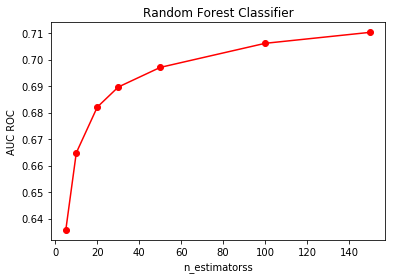

In [20]:
import datetime
start_time = datetime.datetime.now()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score
n_folds = 5;
kf = KFold(len(X), n_folds=n_folds, shuffle=True, random_state=1);
scoreList = list()
timeList =list();
nEstimList =[ 5,10,20,30,50,100,150]
for n in  nEstimList  :
    clf = GradientBoostingClassifier(n_estimators=n, random_state=0);
    score = 0;
    start_time = datetime.datetime.now();
    print 'Start gredient boosting with n=',n
    for train_index, test_index in kf:
        X_train, X_test = X.values[train_index,:], X.values[test_index,:]
        y_train, y_test = y.values[train_index], y.values[test_index]

        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)[:,1];
        s = roc_auc_score(y_test, y_pred)
        score = score + s;
    t = (datetime.datetime.now() - start_time).seconds;
    timeList.append(t);
    sAverage = score/n_folds;
    print 'Average score = ', sAverage
    scoreList.append(sAverage)
    print 'Time elapsed:', t,' sec.'

# Plot Results
import matplotlib.pyplot as plt
plt.plot(nEstimList,scoreList,'-ro')
plt.title('Random Forest Classifier')
plt.ylabel ('AUC ROC')
plt.xlabel ('n_estimatorss')
plt.show()


Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

- Зависит от размеров данных и стоимости времени обучения. На данном наборе данных увеличение времени обучения с 70 секунд до 220 не кажется критичным, так что вполне можно увеличить количество деревьев до 100, чтобы получить 2% улучшение при троекратном росте времени.
- Дальнейшее увеличение количества деревьев до 150 дает 6 кратный рост затрат по времени и 3% улучшения. Для данной задачи это кажется уже не приемлемым.
- Можно уменьшить максимальную глубину каждого дерева с 3 до 2, это сократит время обучения примерно в 1.5 раза, но и качество обучения пострадает. Вместе с тем, у нас достаточно большое количество признаков,  так что можно упростить процесс в каждом дереве, установив max_features = 10. То есть каждое дерево при построении оптимального разделения будет рассматривать не всю сотню, а только 10 признаков. В этом случае деревья обучаются примерно в 3-4 раза быстрее при незначительном падении качества классификации, смотри код ниже. Вполне реально дождаться обучения с лесом из 200 деревьев.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Start gredient boosting with n= 5
Average score =  0.63980634286
Time elapsed: 7  sec.
Start gredient boosting with n= 10
Average score =  0.663574186581
Time elapsed: 12  sec.
Start gredient boosting with n= 20
Average score =  0.680945856495
Time elapsed: 20  sec.
Start gredient boosting with n= 30
Average score =  0.68818403634
Time elapsed: 30  sec.
Start gredient boosting with n= 50
Average score =  0.696579829343
Time elapsed: 48  sec.
Start gredient boosting with n= 100
Average score =  0.705603012025
Time elapsed: 94  sec.
Start gredient boosting with n= 150
Average score =  0.709621040722
Time elapsed: 139  sec.
Start gredient boosting with n= 500
Average score =  0.719551012284
Time elapsed: 448  sec.
Start gredient boosting with n= 1000
Average score =  0.723172732131
Time elapsed: 860  sec.


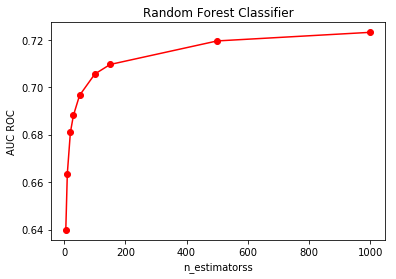

In [51]:
import datetime
start_time = datetime.datetime.now()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score
n_folds = 5;
kf = KFold(len(X), n_folds=n_folds, shuffle=True, random_state=1);
scoreList = list()
timeList =list();
nEstimList =[ 5,10,20,30,50,100,150,500,1000]
for n in  nEstimList  :
    clf = GradientBoostingClassifier(n_estimators=n, random_state=0,max_features = 40);
    score = 0;
    start_time = datetime.datetime.now();
    print 'Start gredient boosting with n=',n
    for train_index, test_index in kf:
        X_train, X_test = X.values[train_index,:], X.values[test_index,:]
        y_train, y_test = y.values[train_index], y.values[test_index]

        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)[:,1];
        s = roc_auc_score(y_test, y_pred)
        score = score + s;
    t = (datetime.datetime.now() - start_time).seconds;
    timeList.append(t);
    sAverage = score/n_folds;
    print 'Average score = ', sAverage
    scoreList.append(sAverage)
    print 'Time elapsed:', t,' sec.'

# Plot Results
import matplotlib.pyplot as plt
plt.plot(nEstimList,scoreList,'-ro')
plt.title('Random Forest Classifier')
plt.ylabel ('AUC ROC')
plt.xlabel ('n_estimatorss')
plt.show()

## Часть 2. Логистическая регрессия

1 Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

Start logistic regression with C= 1e-07
Average Score =  0.687172825424
Time elapsed: 1
Start logistic regression with C= 1e-06
Average Score =  0.688089228326
Time elapsed: 2
Start logistic regression with C= 1e-05
Average Score =  0.695026665369
Time elapsed: 2
Start logistic regression with C= 0.0001
Average Score =  0.711162901344
Time elapsed: 4
Start logistic regression with C= 0.001
Average Score =  0.716185125372
Time elapsed: 7
Start logistic regression with C= 0.01
Average Score =  0.716398244398
Time elapsed: 10
Start logistic regression with C= 0.1
Average Score =  0.716380165727
Time elapsed: 11
Start logistic regression with C= 1
Average Score =  0.716376805707
Time elapsed: 11


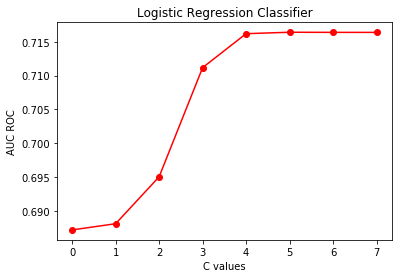

In [62]:
def LogRegressionCrossValiedation(X,y,Clist,nFolds):
	from sklearn.metrics import roc_auc_score
	from sklearn import linear_model
	ScoreList = list();
	kf = KFold(len(X), n_folds=n_folds, shuffle=True);
	for C in Clist:
		logreg = linear_model.LogisticRegression(penalty='l2',C=C)
		score = 0;
		start_time = datetime.datetime.now();
		print 'Start logistic regression with C=',C
		for train_index, test_index in kf:
			X_train, X_test = X[train_index,:], X[test_index,:]
			y_train, y_test = y[train_index]  , y[test_index]

			logreg.fit(X_train, y_train)

			y_pred = logreg.predict_proba(X_test)[:,1];
			
			s = roc_auc_score(y_test,y_pred);
			score = score + s;
    
		t = (datetime.datetime.now() - start_time).seconds;
		sAvg = score/nFolds;
		print'Average Score = ',sAvg
		print 'Time elapsed:', t 
		ScoreList.append(sAvg)
	return ScoreList

nFolds = 5;
CCoefList = [1E-7,1E-6,1E-5,1E-4,1E-3,1E-2,1E-1,1];
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X);
LogScoreList = LogRegressionCrossValiedation(Xscaled,y.values,CCoefList,nFolds);


import matplotlib.pyplot as plt
plt.plot(LogScoreList,'-ro')
plt.title('Logistic Regression Classifier')
plt.ylabel ('AUC ROC')
plt.xlabel ('C values')
plt.show()

Какое качество получилось у логистической регрессии над всеми исходными признаками?  

>0.716

Как оно соотносится с качеством градиентного бустинга?

>Немного превосходит его

Чем вы можете объяснить эту разницу?

>Разница незначительная

 Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

>Да

Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

Start logistic regression with C= 1e-07
Average Score =  0.687346884081
Time elapsed: 1
Start logistic regression with C= 1e-05
Average Score =  0.695208328991
Time elapsed: 2
Start logistic regression with C= 0.01
Average Score =  0.716632401006
Time elapsed: 10
Start logistic regression with C= 0.001
Average Score =  0.716447288702
Time elapsed: 7
Start logistic regression with C= 0.01
Average Score =  0.716632401006
Time elapsed: 11
Start logistic regression with C= 1
Average Score =  0.716603473878
Time elapsed: 10


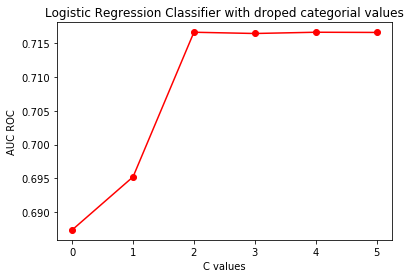

In [53]:
def drop_categorial(X):
    Xdroped = X.copy();
    skipFieldList = ['lobby_type',
                     'r1_hero',
                     'r2_hero',
                     'r3_hero',
                     'r4_hero',
                     'r5_hero',
                     'd1_hero',
                     'd2_hero',
                     'd3_hero',
                     'd4_hero',
                     'd5_hero'];
    for f in skipFieldList:
        Xdroped.drop(f,1,inplace=True)
    return Xdroped
Xdroped = drop_categorial(X);
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xdroped)
XDropedScaled = scaler.transform(Xdroped);
nFolds = 5;
CCoefList = [1E-7,1E-5,1E-2,1E-3,1E-2,1];
LogScoreList = LogRegressionCrossValiedation(XDropedScaled,y.values,CCoefList,nFolds);
import matplotlib.pyplot as plt
plt.plot(LogScoreList,'-ro')
plt.title('Logistic Regression Classifier with droped categorial values')
plt.ylabel ('AUC ROC')
plt.xlabel ('C values')
plt.show()

Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? 
> 0.716, никак

Чем вы можете объяснить это изменение?

> Для классификатора эти данные являются шумовыми

На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [44]:
import numpy as np
HerosList = ['r1_hero',
             'r2_hero',
             'r3_hero',
             'r4_hero',
             'r5_hero',
             'd1_hero',
             'd2_hero',
             'd3_hero',
             'd4_hero',
             'd5_hero'];
Nunique= (np.unique(X[HerosList].values)).size;
Nmax   = np.max(X[HerosList].values);
matrix = X[HerosList].values ;
print 'Unique heroes in set', N
print 'Maximum hero number is ',Nmax

Unique heroes in set 108
Maximum hero number is  112


Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [35]:
import numpy as np
HerosList = ['r1_hero',
             'r2_hero',
             'r3_hero',
             'r4_hero',
             'r5_hero',
             'd1_hero',
             'd2_hero',
             'd3_hero',
             'd4_hero',
             'd5_hero'];
Nunique= (np.unique(X[HerosList].values)).size;
Nmax   = np.max(X[HerosList].values);
matrix = X[HerosList].values ;
print 'Unique heroes in set', N
print 'Maximum hero number is ',Nmax

Unique heroes in set 108
Maximum hero number is  112


Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [55]:
def get_bagOfHeroes(X,N):
    X_pick = np.zeros((X.shape[0], Nmax))
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
    return X_pick

Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

Start logistic regression with C= 1e-07
Average Score =  0.68945044604
Time elapsed: 1
Start logistic regression with C= 1e-05
Average Score =  0.699178524587
Time elapsed: 2
Start logistic regression with C= 0.001
Average Score =  0.746177085291
Time elapsed: 9
Start logistic regression with C= 0.01
Average Score =  0.75156752158
Time elapsed: 16
Start logistic regression with C= 0.1
Average Score =  0.751776883217
Time elapsed: 21
Start logistic regression with C= 1
Average Score =  0.751761295346
Time elapsed: 23


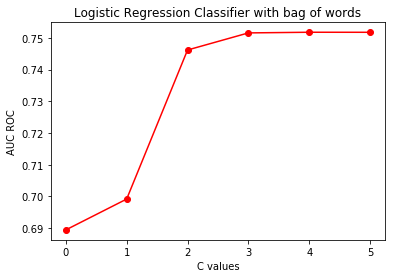

In [57]:
X_pick = get_bagOfHeroes(X,Nmax);
bagOfWordsX = np.concatenate( (XDropedScaled,X_pick) , axis = 1);
CCoefList = [1E-7,1E-5,1E-3,1E-2,1E-1,1];
nFolds = 5;
LogScoreList = LogRegressionCrossValiedation(bagOfWordsX,y.values,CCoefList,nFolds);
import matplotlib.pyplot as plt
plt.plot(LogScoreList,'-ro')
plt.title('Logistic Regression Classifier with bag of words')
plt.ylabel ('AUC ROC')
plt.xlabel ('C values')
plt.show()

Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
> Качество выросло до 75.1%, это лучшая модель. Качество выросло так как рассмотрение категориальных признаков в качестве числовых не несет никакой информации, добавляя шум в модель. Убирая этот шум и превращая в адекватно рассматриваемую категорию получаем улучшение качества.

## Часть 3. Предсказание на тестовой выборке

Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

In [58]:
#%% Get best model
from sklearn import linear_model                            
logreg = linear_model.LogisticRegression(penalty='l2',C=0.1)
logreg.fit(bagOfWordsX,y.values)
y_pred = logreg.predict_proba(bagOfWordsX)[:,1];
s      = roc_auc_score(y.values,y_pred)
print s

0.754446954846


Minimum value of win propability =  0.0084303232433
Maximum value of win propability =  0.996371179596


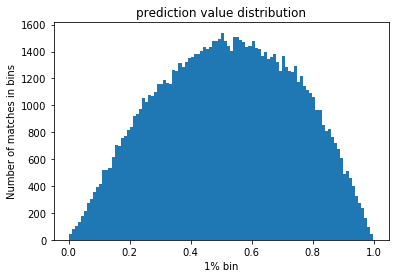

In [59]:
X_test = pandas.read_csv('features_test.csv',index_col='match_id')
X_test = X_test.fillna(0);
X_test_droped = drop_categorial(X_test);
scaler = preprocessing.StandardScaler().fit(Xdroped)
X_test_scaled = scaler.transform(X_test_droped);
bagOfTestHeros = get_bagOfHeroes(X_test,Nmax);
X_test_full = np.concatenate((X_test_scaled,bagOfTestHeros) , axis = 1);             
y_pred_test = logreg.predict_proba(X_test_full)[:,1];
print 'Minimum value of win propability = ', np.min(y_pred_test)
print 'Maximum value of win propability = ', np.max(y_pred_test)
plt.hist(y_pred,bins=100);
plt.title('prediction value distribution')
plt.ylabel ('Number of matches in bins')
plt.xlabel ('1% bin')
plt.show()


Видим, что имеет место некоторое распределение, вероятности распределены от 0 до 1.

In [61]:
#%% Save to CSV for Kaggle
import pandas as pd
dfRes = pd.DataFrame(y_pred_test, index = X_test.index,columns={'radiant_win'});
dfRes.to_csv('test_results3.csv');


https://inclass.kaggle.com/c/dota-2-win-probability-prediction/leaderboard?submissionId=4306003

Полученный результат 0.7551, что довольно близко к результату на тренировочных данных, т.е. переобучения удалось избежать.

Вместе с тем, попытка обучиться на тех же данных градиетным бустингом с 500 деревьями дала результат 0.76 на тренировочной выборке, но только 0.74552 на тестовой при гораздо большем времени обучения.

345/811, по крайней мере попадание в верхнюю часть списка
